In [1]:
import os

In [2]:
dataset_dir = './PKUMMDv2/'
skeleton_dir = os.path.join(dataset_dir, 'Data/skeleton')
label_dir = os.path.join(dataset_dir, 'Label')
print('skeleton directory:', skeleton_dir)
print('label directory:', label_dir)

skeleton directory: ./PKUMMDv2/Data/skeleton
label directory: ./PKUMMDv2/Label


In [3]:
NUM_ACTIONS = 51

#### 计算每类动作的个数、序列长度最大值

In [4]:
num_data = [0] * NUM_ACTIONS
max_sequence_length = [0] * NUM_ACTIONS

In [5]:
def retrieve_content(file_path):
    with open(file_path, 'r') as fp:
        content = fp.readlines()
    return content

In [6]:
def parse_label(label_path):
    labels = retrieve_content(label_path)
    action_classes, start_times, end_times = [], [], []
    for label in labels:
        label = label.split(',')
        action_classes.append(int(label[0]))
        start_times.append(int(label[1]))
        end_times.append(int(label[2]))
    return len(action_classes), action_classes, start_times, end_times

In [7]:
for label_file in os.listdir(label_dir):
    # avoid file like .DS_Store
    if '.txt' not in label_file:
        continue
    data_id = label_file.split('.')[0]
    label_path = os.path.join(label_dir, label_file)
    num_actions, action_classes, start_times, end_times = parse_label(label_path)
    
    for i in range(num_actions):
        action_class = action_classes[i] - 1
        sequence_length = end_times[i] - start_times[i]
        num_data[action_class] += 1
        max_sequence_length[action_class] = max(max_sequence_length[action_class], sequence_length)

**PKU-MMD v2中没有数据的动作类别**  
与Split/Actions_v2.xlsx相同

In [8]:
no_data_classes = []
for i in range(NUM_ACTIONS):
    if num_data[i] is 0:
        no_data_classes.append(i + 1)
print('PKU-MMD v2 does not contain data in class(es):', no_data_classes)

PKU-MMD v2 does not contain data in class(es): [12, 14, 16, 18, 21, 24, 26, 27, 29, 38]


In [9]:
import matplotlib.pyplot as plt

In [10]:
actions = [i for i in range(1, NUM_ACTIONS + 1)]

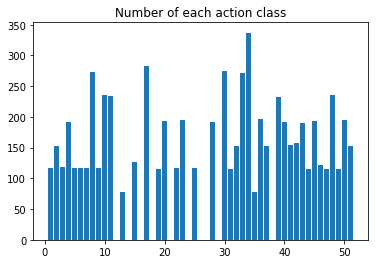

In [11]:
# number of each action class
plt.figure()
plt.title('Number of each action class')
plt.bar(x=actions, height=num_data)
plt.savefig('number_action_classes.png', dpi=300)
plt.show()

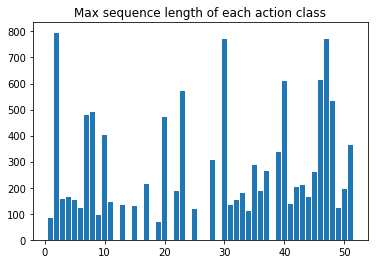

In [12]:
# max sequence length of each action class
plt.figure()
plt.title('Max sequence length of each action class')
plt.bar(x=actions, height=max_sequence_length)
plt.savefig('max_sequence_action_classes.png', dpi=300)
plt.show()

In [13]:
print('max sequence length in PKU-MMD v2:', max(max_sequence_length))

max sequence length in PKU-MMD v2: 795


基于以上的探索，我们首先定义所有动作的序列长度都是800（大于最大值795）  
对于序列长度小于800的动作，我们采用0来补齐